In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

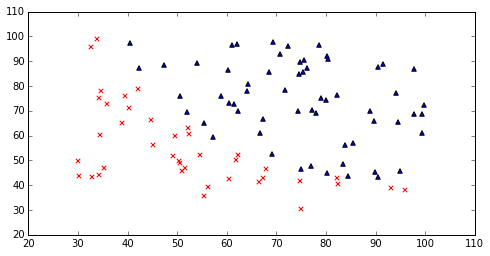

In [2]:
import numpy as np
import matplotlib.pyplot as plt
ex2d1 = np.loadtxt("ex2data1.txt", delimiter=",")
plt.scatter(ex2d1[ex2d1[:,2]==1][:,0], ex2d1[ex2d1[:,2]==1][:,1], marker = "^")
plt.scatter(ex2d1[ex2d1[:,2]==0][:,0], ex2d1[ex2d1[:,2]==0][:,1], marker = "x", c = "r")

In [3]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def J(thetas, data, y):
    return (-1./len(data[:,0])) * (np.dot((np.log(sigmoid(np.dot(xs,thetas))).T),y) + np.dot((np.log(1 - sigmoid(np.dot(xs,thetas))).T),(1-y)))

#prepare the data
x0 = np.ones(len(ex2d1[:,0]))
xs = ex2d1[:,0:2]
intercept = np.ones(xs.shape[0]).reshape(xs.shape[0], 1)
xs = np.concatenate((intercept, xs), axis = 1)
thetas = np.array([0, 0, 0])
y = ex2d1[:,2]


J(thetas, xs, y)

0.69314718055994529

In [5]:
import scipy.optimize
import scipy as sp

optimise = scipy.optimize.fmin_bfgs(J, 
                                  x0 = np.array([0.01, 0.001, 0.01]), 
                                  args = (xs, y),
                                  maxiter = 1000)
optimise

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 24
         Function evaluations: 135
         Gradient evaluations: 27


array([-25.16121449,   0.20623075,   0.20147067])

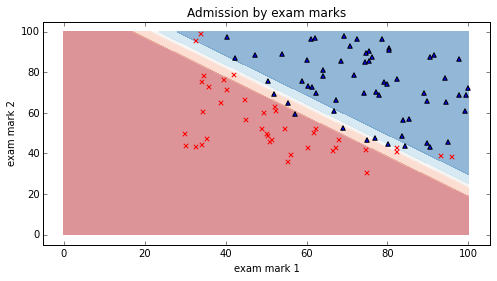

In [6]:
# want to get all combinations that result in 0.5
# ie., sigmoid(th0 + th1 * x1 + th2 * x2) = 0.5
def probs(x, t):
    return sigmoid(t[0] + t[1]*x[0] + t[2]*x[1])

prob = np.zeros(shape = (101,101))
for i in np.arange(0, 101, 1):
    for j in np.arange(0, 101, 1):
        prob[i, j] = probs(x = (i, j), t = optimise)

cmap = plt.cm.RdBu
plt.contourf(prob, alpha=0.5, levels = [0,0.25, 0.45, 0.5, 0.55, 0.75, 1], cmap = cmap)
plt.scatter(ex2d1[ex2d1[:,2]==1][:,0], ex2d1[ex2d1[:,2]==1][:,1], marker = "^")
plt.scatter(ex2d1[ex2d1[:,2]==0][:,0], ex2d1[ex2d1[:,2]==0][:,1], marker = "x", c = "r")
plt.title("Admission by exam marks")
plt.ylabel("exam mark 2")
plt.xlabel("exam mark 1")

In [7]:
def gradient(thetas, data, y):
    hypo = sigmoid(np.dot(thetas, data.T))
    return (1./len(data[:,0]))*np.dot((hypo-y), data)

#test
gradient(thetas, xs, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [8]:
optGr = scipy.optimize.fmin_bfgs(J, fprime=gradient,  
                                  x0 = np.array([0.01, 0.001, 0.01]), 
                                  args = (xs, y),
                                  maxiter = 1000)
optGr

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


array([-25.16131518,   0.20623155,   0.20147149])

In [9]:
optCng = scipy.optimize.fmin_ncg(J, maxiter = 1000, fprime = gradient, 
                                 x0 = np.array([0.01, 0.001, 0.01]),
                                 args = (xs, y))

optCng

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 64
         Gradient evaluations: 216
         Hessian evaluations: 0


array([-25.136374  ,   0.2060321 ,   0.20126961])

In [10]:
#check the gradient
scipy.optimize.check_grad(J, gradient, thetas, xs, y)

1.2403493395440989e-05

In [11]:
# prediction for exam 1 = 45, exam 2 = 85
sigmoid(optimise[0] + optimise[1] * 45 + optimise[2]*85)

0.77629011355772293

In [12]:
# check how will the predictors have worked
# will essentially want the training sample values

#need a function to calculate all of the values
#xs[:,1]
def t_error(x, t):
    #first need the probability of admission
    prob = sigmoid(t[0] +  x[:,1] * t[1] + x[:,2] * t[2])
    preds = np.zeros(np.shape(prob)[0])
    for i in np.arange(0, np.shape(prob)[0]):
        if prob[i] >= 0.5:
            preds[i] = 1
    return preds
    


#bfgs
preds = t_error(xs, optimise)
print(np.sum(y == preds))

#bfgs w/ gr
pred2 = t_error(xs, optGr)
print(np.sum(y == pred2))

#cng
pred3 = t_error(xs, optCng)
print(np.sum(y == pred3))

89
89
89


#### Regularised logistic regression

In [ ]:
# To do....